# Correlation between participants


## Purpose
Testing the correlation between P1-5, see if they share an mutual patterns in step count.


## Results
Low and close to zero correlation between the participants except for between P1 and P2 where they share a correlation of 0.778918



# Setup

## Library import
We import all the required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import CategoricalDtype
import seaborn as sns

## Local library import
We import all the required local libraries libraries

In [19]:
# Include local library paths
# Import local libraries

dataset_path = Path('../../../datasets')
raw_data_p1 = pd.read_csv(dataset_path / 'Participant-01.csv')
p1 = raw_data_p1.copy()

raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()

raw_data_p3 = pd.read_csv(dataset_path / 'Participant-03.csv')
p3 = raw_data_p3.copy()

raw_data_p4 = pd.read_csv(dataset_path / 'Participant-04.csv')
p4 = raw_data_p4.copy()

raw_data_p5 = pd.read_csv(dataset_path / 'Participant-05-detail.csv')
p5 = raw_data_p5.copy()


# Data import
We retrieve all the required data for the analysis.

In [3]:
p1

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


In [4]:
p2

,Source,Date,Hour,Count
0,P2 Phone,2022-01-01,5,31
1,P2’s Apple Watch,2021-12-31,21,20
2,P2’s Apple Watch,2021-12-31,21,16
3,P2’s Apple Watch,2022-01-01,5,29
4,P2’s Apple Watch,2022-01-01,5,13
...,...,...,...,...
31633,P2 Phone,2022-09-01,19,498
31634,P2 Phone,2022-09-01,19,26
31635,P2’s Apple Watch,2022-09-01,19,110
31636,P2 Phone,2022-09-01,20,21


In [5]:
p5

,Source,Date,Hour,Count
0,person5,2022-01-27,8,4
1,person5,2022-01-02,13,78
2,person5,2022-01-02,12,66
3,person5,2022-01-02,12,57
4,person5,2022-01-02,12,99
...,...,...,...,...
12132,person5,2022-09-01,19,59
12133,person5,2022-09-01,19,102
12134,person5,2022-09-01,19,15
12135,person5,2022-09-01,21,35


# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

In [55]:
# i want to create a function that subs in the dataset for the following operations so I don't have to repeat these steps
def sub(data):
#     convert start,finish columns to datetime formats
    data['Start'] = pd.to_datetime(data['Start'])
    data['Finish'] = pd.to_datetime(data['Finish'])
#     extract the weekday name, month names and date in YYYY-MM-DD format from start column
    data['Week Day'] = data['Start'].dt.day_name()
    data['Month'] = data['Start'].dt.month_name()
    data['Date'] = data['Start'].dt.date
#     convert date to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
#     week days are ordered so that it's matches the order that day of the week are.
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    data['Week Day'] = data['Week Day'].astype(cat_type)
# I want to drop the months of december and september as they have less than 1 week of recorded data so not very useful
    data.drop(data[data['Month'] == 'December'].index, inplace = True)
    data.drop(data[data['Month'] == 'September'].index, inplace = True)

In [37]:
p1['Start'] = pd.to_datetime(p1['Start'])
p1['Finish'] = pd.to_datetime(p1['Finish'])
p1['Week Day'] = p1['Start'].dt.day_name()
p1['Month'] = p1['Start'].dt.month_name()
p1['Date'] = p1['Start'].dt.date
p1['Date'] = pd.to_datetime(p1['Date'])
p2['Date'] = pd.to_datetime(p2['Date'])
p2['Week Day'] = p2['Date'].dt.day_name()
p2['Month'] = p2['Date'].dt.month_name()
p5['Date'] = pd.to_datetime(p5['Date'])
p5['Week Day'] = p5['Date'].dt.day_name()
p5['Month'] = p5['Date'].dt.month_name()

p2 = p2.rename(columns={'Count': 'P2 Steps (count)'})
p3 = p3.rename(columns={'Steps (count)': 'P3 Steps (count)'})
p4 = p4.rename(columns={'Steps (count)': 'P4 Steps (count)'})
p5 = p5.rename(columns={'Count': 'P5 Steps (count)'})

from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
p1['Week Day'] = p1['Week Day'].astype(cat_type)
p2['Week Day'] = p2['Week Day'].astype(cat_type)
p5['Week Day'] = p5['Week Day'].astype(cat_type)

p1.drop(p1[p1['Month'] == 'December'].index, inplace = True)
p1.drop(p1[p1['Month'] == 'September'].index, inplace = True)
p2.drop(p2[p2['Month'] == 'December'].index, inplace = True)
p2.drop(p2[p2['Month'] == 'September'].index, inplace = True)
p5.drop(p5[p5['Month'] == 'December'].index, inplace = True)
p5.drop(p5[p5['Month'] == 'September'].index, inplace = True)

In [33]:
sub(p3)
sub(p4)

In [38]:
p4

,Start,Finish,P4 Steps (count),Week Day,Month,Date
0,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000,Saturday,January,2022-01-01
1,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000,Saturday,January,2022-01-01
2,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000,Saturday,January,2022-01-01
3,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000,Saturday,January,2022-01-01
4,2022-01-01 04:00:00,2022-01-01 05:00:00,0.000000,Saturday,January,2022-01-01
...,...,...,...,...,...,...
5828,2022-08-31 19:00:00,2022-08-31 20:00:00,290.129473,Wednesday,August,2022-08-31
5829,2022-08-31 20:00:00,2022-08-31 21:00:00,263.870527,Wednesday,August,2022-08-31
5830,2022-08-31 21:00:00,2022-08-31 22:00:00,111.000000,Wednesday,August,2022-08-31
5831,2022-08-31 22:00:00,2022-08-31 23:00:00,0.000000,Wednesday,August,2022-08-31


In [51]:
day = p1.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day2 = p2.groupby(['Date'], as_index=False).agg({'P2 Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day3 = p3.groupby(['Date'], as_index=False).agg({'P3 Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day4 = p4.groupby(['Date'], as_index=False).agg({'P4 Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day5 = p5.groupby(['Date'], as_index=False).agg({'P5 Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
# day = p1.groupby(['Week Day'], as_index=False).agg({'Steps (count)': 'sum'})
# day2 = p2.groupby(['Week Day'], as_index=False).agg({'P2 Steps (count)': 'sum'})
# day3 = p3.groupby(['Week Day'], as_index=False).agg({'P3 Steps (count)': 'sum'})
# day4 = p4.groupby(['Week Day'], as_index=False).agg({'P4 Steps (count)': 'sum'})
# day5 = p5.groupby(['Week Day'], as_index=False).agg({'P5 Steps (count)': 'sum'})
day2

,Date,P2 Steps (count),Week Day,Month
0,2021-10-08,41,Friday,October
1,2022-01-01,22332,Saturday,January
2,2022-01-02,23324,Sunday,January
3,2022-01-03,8887,Monday,January
4,2022-01-04,22684,Tuesday,January
...,...,...,...,...
239,2022-08-27,23460,Saturday,August
240,2022-08-28,17600,Sunday,August
241,2022-08-29,13363,Monday,August
242,2022-08-30,17756,Tuesday,August


In [52]:
t = pd.merge(day[['Date','Steps (count)']],day2[['P2 Steps (count)','Date']],on='Date', how='left')
t = pd.merge(t,day5[['P5 Steps (count)','Date']],on='Date', how='left')
t = pd.merge(t,day3[['P3 Steps (count)','Date']],on='Date', how='left')
t = pd.merge(t,day4[['P4 Steps (count)','Date']],on='Date', how='left')
t

,Date,Steps (count),P2 Steps (count),P5 Steps (count),P3 Steps (count),P4 Steps (count)
0,2022-01-01,11609.000000,22332,114.0,1614.000000,6291.000000
1,2022-01-02,10337.000000,23324,8681.0,43.000000,17815.000000
2,2022-01-03,6310.000000,8887,5104.0,7461.000000,8173.715753
3,2022-01-04,14395.000000,22684,8031.0,9360.999999,8843.948159
4,2022-01-05,11026.000000,19482,7743.0,5008.000000,8341.344430
...,...,...,...,...,...,...
238,2022-08-27,13936.000000,23460,12485.0,2295.000000,11370.125328
239,2022-08-28,11619.000000,17600,12888.0,1118.000000,5172.000000
240,2022-08-29,8332.918443,13363,6036.0,12679.000000,14686.000000
241,2022-08-30,8834.000000,17756,9820.0,9600.000000,9184.019740


In [53]:
t.corr()

,Steps (count),P2 Steps (count),P5 Steps (count),P3 Steps (count),P4 Steps (count)
Steps (count),1.000000,0.778918,0.030903,-0.003323,-0.044955
P2 Steps (count),0.778918,1.000000,0.042466,0.016141,-0.004040
P5 Steps (count),0.030903,0.042466,1.000000,-0.005576,-0.065068
P3 Steps (count),-0.003323,0.016141,-0.005576,1.000000,0.040565
P4 Steps (count),-0.044955,-0.004040,-0.065068,0.040565,1.000000


Text(0.5, 1.0, 'Correlation between participants in step patterns')

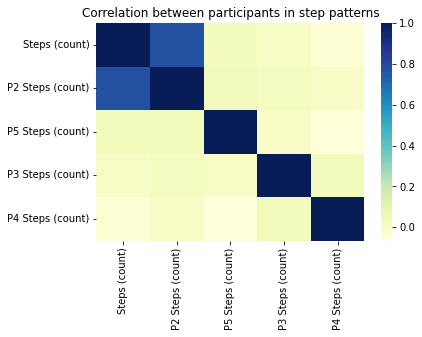

In [54]:
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
# t2 = week_month_count3.pivot("Month", "Week Day", "Rainfall amount (millimetres)")
# now plot the data using seaborn
ax = sns.heatmap(t.corr(),cmap='YlGnBu')
ax.set_title('Correlation between participants in step patterns')

From this we can see there is basically no correlation between the 5 participants except for between P1 and P2 where they have a high correlation of 0.778918 in their step counts, this could indicate that these two individuals have a daily routine that share similiarities for example they have class on the same days. 